In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import svm

pkl_file = open('fingerprint_data.pkl', 'rb')
x_train, x_test, y_train, y_test = pickle.load(pkl_file)

x_train = x_train.reshape(x_train.shape[0],372*312)
x_test = x_test.reshape(x_test.shape[0],372*312)

In [48]:
for str in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVC(kernel=str, gamma='auto') # or gamma='scale'
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print('Acurácia', str, '= ', acc*100, '%')

Acurácia linear =  76.66666666666667 %
Acurácia poly =  73.33333333333333 %
Acurácia rbf =  16.666666666666664 %
Acurácia sigmoid =  13.333333333333334 %


In [49]:
# Escolhendo o modelo com maior acurácia (linear) para fazer alguns testes:

clf = svm.SVC(kernel='linear', gamma='auto') # or gamma='scale'
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
# Validação cruzada kFold

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv=4)
scores     

array([0.66666667, 0.75      , 0.71428571, 0.83333333])

In [52]:
print("Acurácia média + intervalo de confiança de 95%% : %0.2f (+/- %0.2f) %%" % (scores.mean(), scores.std() * 2))

Acurácia média + intervalo de confiança de 95% : 0.74 (+/- 0.12) %


In [53]:
# Usando pré-processamento

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_transformed = scaler.transform(x_train)
# clf = svm.SVC(C=1).fit(x_train_transformed, y_train)
x_test_transformed = scaler.transform(x_test)
# clf.score(x_test_transformed, y_test)  


In [54]:
# Retreinando com os conjuntos pré-processados

clf = svm.SVC(kernel='linear', gamma='auto') # or gamma='scale'
clf.fit(x_train_transformed, y_train)
acc = clf.score(x_test_transformed, y_test)
print('Nova acurácia =' , acc*100, '%')

Nova acurácia = 76.66666666666667 %


In [56]:
scores = cross_val_score(clf, x_train_transformed, y_train, cv=4)
scores   

array([0.66666667, 0.75      , 0.85714286, 0.83333333])

In [57]:
print("Nova acurácia média + intervalo de confiança de 95%% : %0.2f (+/- %0.2f) %%" % (scores.mean(), scores.std() * 2))

Nova acurácia média + intervalo de confiança de 95% : 0.78 (+/- 0.15) %


In [58]:
# A mesma coisa utilizando pipeline

from sklearn.pipeline import make_pipeline

clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='linear', gamma='auto'))
cross_val_score(clf, x_train, y_train, cv=cv)

print("Nova acurácia média + intervalo de confiança de 95%% : %0.2f (+/- %0.2f) %%" % (scores.mean(), scores.std() * 2))

Nova acurácia média + intervalo de confiança de 95% : 0.78 (+/- 0.15) %


In [60]:
# O modelo com os melhores resultados foi o svm com kernel linear sem pré-processamento

clf = svm.SVC(kernel='linear', gamma='auto') # or gamma='scale'
# clf.fit(x_train, y_train)
clf.fit(x_train_transformed, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Indivíduo: 4


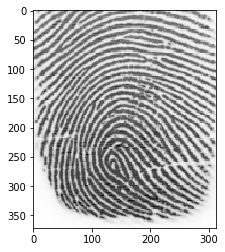

In [61]:
# Avaliação individual

image_index = 0 
plt.imshow(x_test[image_index].reshape(372, 312),cmap='gray')
pred = int(clf.predict(x_test[image_index].reshape(1, -1)))
print('Indivíduo:', pred)